In [2]:
import numpy as np
import random as rm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

[[0.51724889 0.06896702 0.41378409]]


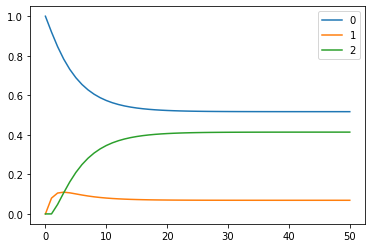

In [3]:
states = ['Susceptible', 'Infected', 'Recovered']

"""
as there are three possible states, the transition matrix will be 3x3
"""

transition_name = [['SS', 'SI', 'SR'],
                   ['IS', 'II', 'IR'],
                   ['RS', 'RI', 'RR']]

transition_matrix = np.array([[0.92, 0.08, 0],
                             [0.0, 0.4, 0.6],
                             [0.1, 0.0, 0.9]])

state = np.array([[1.0, 0.0, 0.0]]) # initialise state 0
stateHist = state # set historial state to current state to confirm markov assumption
dfStateHist = pd.DataFrame(state)
distr_hist = [[0,0,0]]

for x in range(50):
  state=np.dot(state, transition_matrix) # dot product betweeb initial state and transition matrix; 50 simulations
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

print(state)  
dfDistrHist.plot()
plt.show()

Final states after 50 simulations: [[0.55557736 0.06349542 0.38092722]]

Final states after 1000 simulations: [[0.55555556 0.06349206 0.38095238]]


In [17]:
# Transition matrix multiplied by itself for 1000 simulations

steps = 10**3

t_n = transition_matrix

i = 0
while i<steps:
    t_n = np.matmul(t_n, transition_matrix) # multiply transition matrix by itself
    i += 1
print(f"t_n: {t_n}")
print(f"pi: {t_n[0]}") # steady state probabiities

t_n: [[0.51724138 0.06896552 0.4137931 ]
 [0.51724138 0.06896552 0.4137931 ]
 [0.51724138 0.06896552 0.4137931 ]]
pi: [0.51724138 0.06896552 0.4137931 ]


In [22]:
# Find steady states by finding left eigenvalues
import scipy.linalg


values, left = scipy.linalg.eig(transition_matrix, right = False, left = True)

print(f"left eigen vectors = {left}")
print(f"eigen values = {values}")

left eigen vectors = [[-0.77667056 -0.63500064 -0.15430335]
 [-0.10355607 -0.12700013 -0.6172134 ]
 [-0.62133645  0.76200076  0.77151675]]
eigen values = [1.  +0.j 0.8 +0.j 0.42+0.j]


In [23]:
pi = left[:,0] # left eigen vectors
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

[0.517241379310345, 0.06896551724137923, 0.41379310344827575]

In [29]:
# imported module, whereby you can alter the method to calculate steady states
mc = markovChain(transition_matrix)
mc.computePi('linear') #We can also use 'power', 'krylov' or 'eigen'
print(mc.pi)

[0.51724138 0.06896552 0.4137931 ]
